In [121]:
!mkdir task2

mkdir: cannot create directory ‘task2’: File exists


In [122]:
!add-apt-repository -y ppa:alex-p/tesseract-ocr-devel
!apt-get update
!apt-get install tesseract-ocr
!pip install pytesseract

Repository: 'deb https://ppa.launchpadcontent.net/alex-p/tesseract-ocr-devel/ubuntu/ jammy main'
Description:
This PPA contains an OCR engine - libtesseract and a command line program - tesseract. The development version available here (currntly 5.0.0 ) is better in many aspects (functionality, speed, stability) but is not 100 % API compatible with version 4.0. Tesseract 4 added a new neural net (LSTM) based OCR engine which is focused on line recognition, but also still supports the legacy Tesseract OCR engine of Tesseract 3 which works by recognizing character patterns. Compatibility with Tesseract 3 is enabled by using the Legacy OCR Engine mode (--oem 0). It also needs traineddata files which support the legacy engine, for example those from the tessdata repository. Tesseract has unicode (UTF-8) support, and can recognize more than 100 languages "out of the box". Tesseract supports various output formats: plain text, hOCR (HTML), PDF, invisible-text-only PDF, TSV. The master branch

In [123]:
!pip install easyocr
import easyocr

In [124]:
from google.colab.patches import cv2_imshow

In [125]:
import cv2
import numpy as np
import pandas as pd
import pytesseract

In [126]:

# Load the image and preprocess for better result
img_path = input("Enter location of image ")  # Display a prompt to the user
image = cv2.imread(img_path)

        # Resize the image (optional but recommended)
resized_image = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

        # Convert to grayscale
gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

        # Apply Gaussian blur for noise reduction
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

        # Apply adaptive thresholding
_, threshold_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


Enter location of image task2/1.png


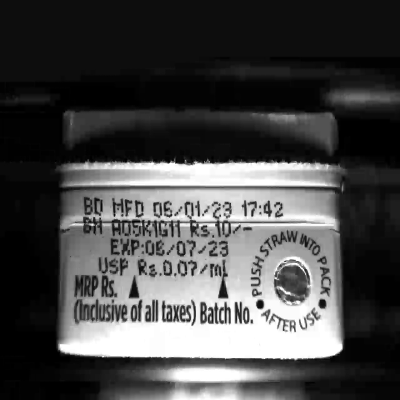

In [132]:
img1 = cv2.resize(image,(400,400))
cv2_imshow(img1)

In [127]:
# approach 1
# Apply Tesseract OCR
extracted_text = pytesseract.image_to_string(threshold_image, lang="eng", config="--psm 6")
print("extracted text from image is \n")
print(extracted_text)

extracted text from image is 

B0 MFO Oe -Mi-Ze3 17:42
——et HMOoKIGH kKs.107-
PF Eup:08 07-23 unm,

2.U. “Tf “4 ‘fj
WP RS. i 2 @ 5
(Wdlusive of all taxes) Batch No. *v-,,



In [128]:
#apprach 2
# applying easyocr
reader = easyocr.Reader(['en'])
result1 = reader.readtext(threshold_image)
result1

[([[544, 1002], [662, 1002], [662, 1104], [544, 1104]],
  'a0',
  0.540211607077525),
 ([[713, 1007], [933, 1007], [933, 1121], [713, 1121]],
  'HF@',
  0.514618849189689),
 ([[966, 1018], [1497, 1018], [1497, 1129], [966, 1129]],
  '[ISz(l1/23',
  0.1897212146803765),
 ([[1529, 1010], [1824, 1010], [1824, 1125], [1529, 1125]],
  '17:42',
  0.8111237007306097),
 ([[703, 1114], [1619, 1114], [1619, 1230], [703, 1230]],
  'RIOSKICTT Rs.10z =',
  0.22466506594213156),
 ([[700, 1208], [1474, 1208], [1474, 1333], [700, 1333]],
  'EXP:OB/07/z3',
  0.07495743711589492),
 ([[453, 1292], [845, 1292], [845, 1546], [453, 1546]],
  'Ds',
  0.14089759097003302),
 ([[865, 1312], [1467, 1312], [1467, 1447], [865, 1447]],
  'R2.0.0? /mL',
  0.5902250420704552),
 ([[1583, 1293], [1706, 1293], [1706, 1538], [1583, 1538]],
  '2',
  0.6056058628755636),
 ([[2016, 1295], [2138, 1295], [2138, 1569], [2016, 1569]],
  '0',
  0.23878752546443138),
 ([[448, 1511], [2065, 1511], [2065, 1718], [448, 1718]],
  '(i

In [129]:
text1 = []
for i in range(len(result1)):
  text1.append(result1[i][1])
text1

['a0',
 'HF@',
 '[ISz(l1/23',
 '17:42',
 'RIOSKICTT Rs.10z =',
 'EXP:OB/07/z3',
 'Ds',
 'R2.0.0? /mL',
 '2',
 '0',
 '(idusive dlall taxes) Batch No *4n#1\'"',
 'STRAW',
 'NTo']

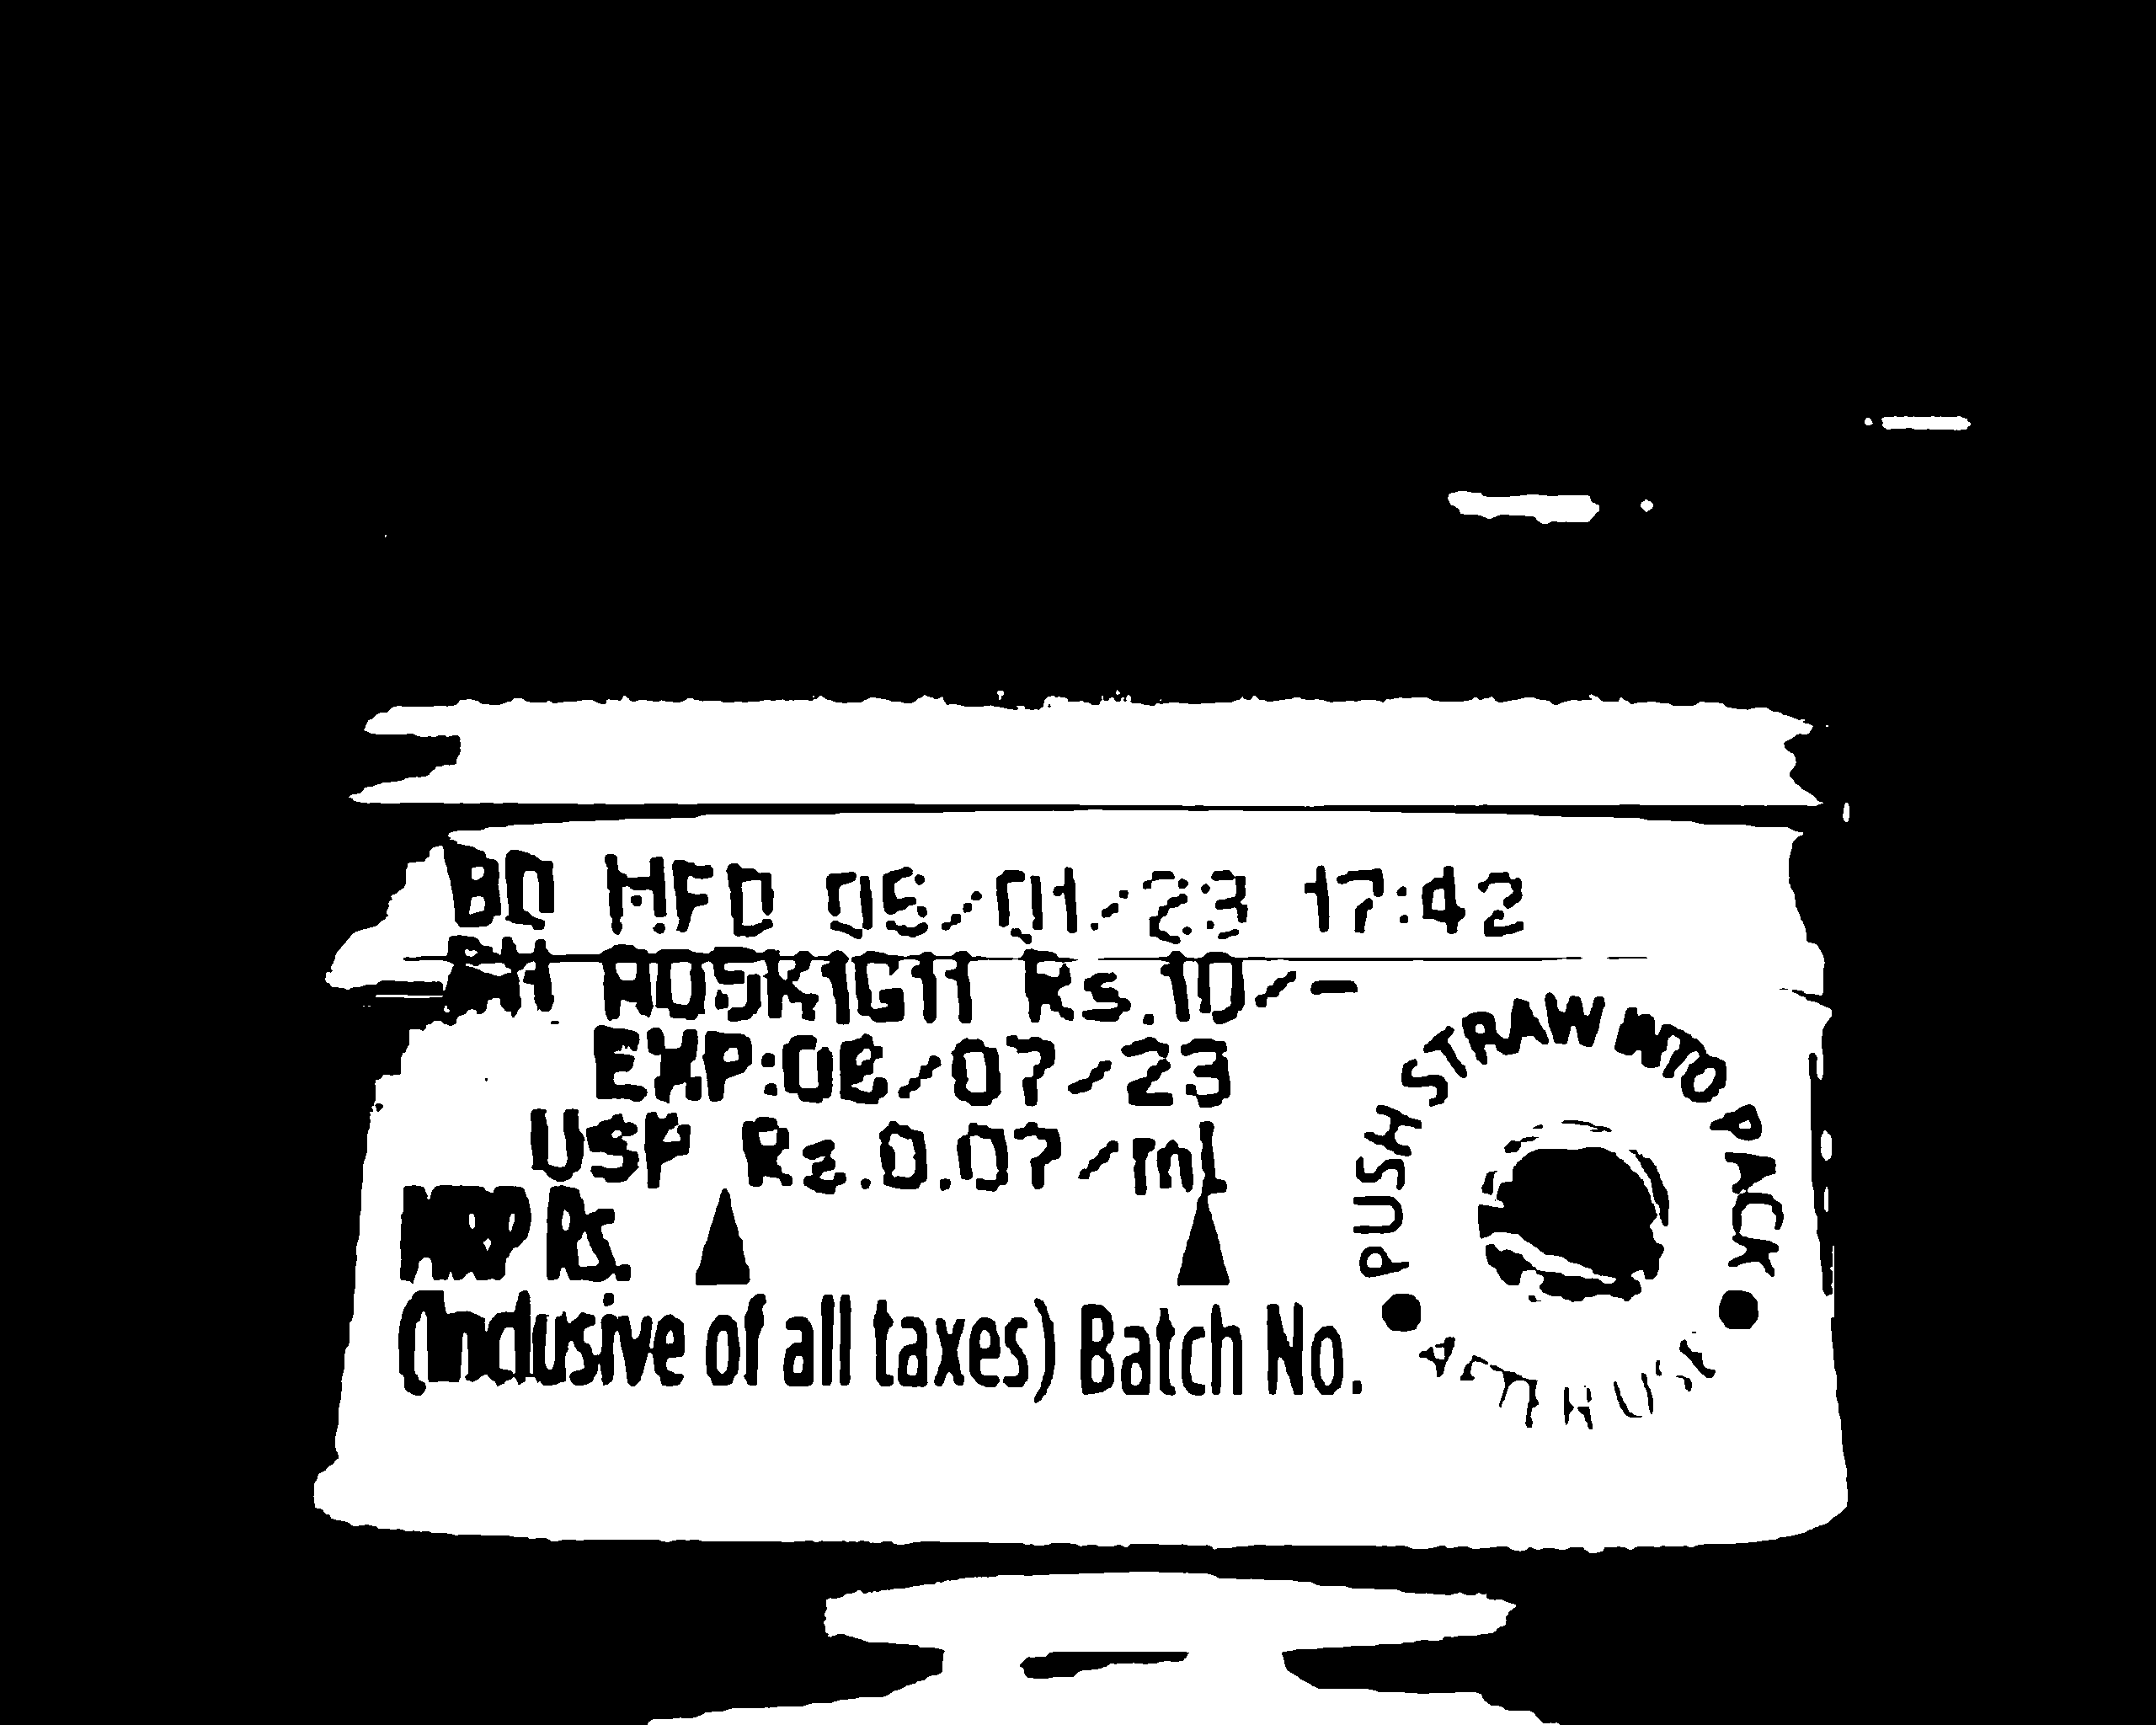

In [130]:
cv2_imshow(threshold_image)